In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch

checkpoint_path = 'results/VitTCross_a0.1_191.pth'

In [2]:
checkpoint = torch.load(checkpoint_path,map_location = torch.device('cpu'))
print(checkpoint.keys())

dict_keys(['model', 'optimizer', 'epoch', 'train_loss', 'eval_loss', 'train_acc', 'eval_acc'])


In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    """Calculate the moving average using a simple sliding window approach."""
    return np.convolve(data, np.ones(window_size) / window_size, 'valid')

def plot_loss_and_accuracy(checkpoint_path, window_size=1000):
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    
    # Extracting metrics from the checkpoint
    train_loss = checkpoint['train_loss']
    eval_loss = checkpoint['eval_loss']
    train_acc = checkpoint['train_acc']
    eval_acc = checkpoint['eval_acc']
    
    # Compute moving averages for training loss and accuracy
    ma_train_loss = moving_average(train_loss, window_size)
    ma_train_acc = moving_average(train_acc, window_size)
    
    # Set up the figure and axes
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Create a grid of 2x3 plots

    # Plot training loss
    axes[0, 0].plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='tab:red')
    axes[0, 0].set_title('Training Loss')
    axes[0, 0].set_xlabel('Iteration')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()

    # Plot evaluation loss
    axes[0, 1].plot(range(1, len(eval_loss) + 1), eval_loss, label='Evaluation Loss', color='tab:blue')
    axes[0, 1].set_title('Evaluation Loss')
    axes[0, 1].set_xlabel('Iteration')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()

    # Plot training accuracy
    axes[0, 2].plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='tab:green')
    axes[0, 2].set_title('Training Accuracy')
    axes[0, 2].set_xlabel('Iteration')
    axes[0, 2].set_ylabel('Accuracy')
    axes[0, 2].legend()

    # Plot evaluation accuracy
    axes[1, 1].plot(range(1, len(eval_acc) + 1), eval_acc, label='Evaluation Accuracy', color='tab:purple')
    axes[1, 1].set_title('Evaluation Accuracy')
    axes[1, 1].set_xlabel('Iteration')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].legend()

    # Plot Moving Average of Training Loss
    axes[1, 0].plot(range(window_size, len(ma_train_loss) + window_size), ma_train_loss, label='MA Training Loss', color='tab:orange', linestyle='--')
    axes[1, 0].set_title('MA Training Loss')
    axes[1, 0].set_xlabel('Iteration')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].legend()

    # Plot Moving Average of Training Accuracy
    axes[1, 2].plot(range(window_size, len(ma_train_acc) + window_size), ma_train_acc, label='MA Training Accuracy', color='olive', linestyle='--')
    axes[1, 2].set_title('MA Training Accuracy')
    axes[1, 2].set_xlabel('Iteration')
    axes[1, 2].set_ylabel('Accuracy')
    axes[1, 2].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage
# plot_loss_and_accuracy('path_to_your_checkpoint.pth', window_size=5)


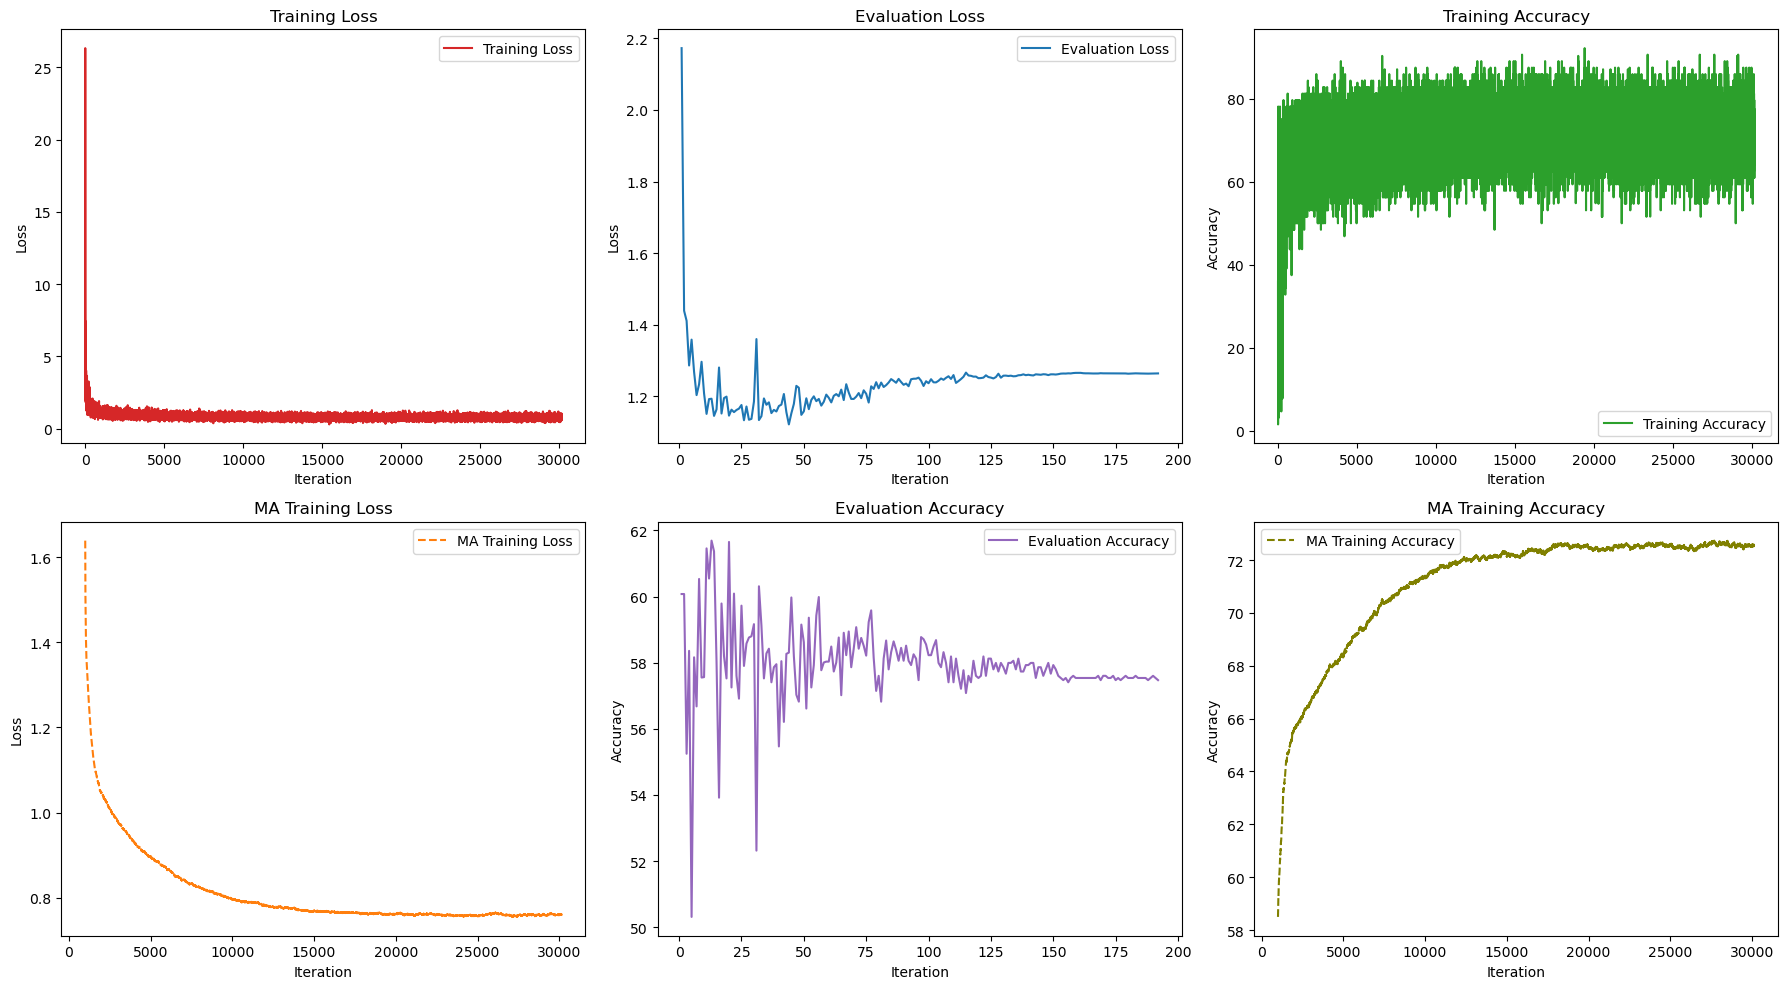

In [6]:
plot_loss_and_accuracy(checkpoint_path)